In [1]:
# Week 8: Unsupervised Learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Set up visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Week 8 Unsupervised Learning Environment Ready!")

# Load your cleaned dataset
df = pd.read_csv('titanic_cleaned.csv')

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print("\nColumns available:")
print(df.columns.tolist())

✅ Week 8 Unsupervised Learning Environment Ready!
Dataset loaded successfully!
Dataset shape: (891, 11)

Columns available:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']


In [2]:
print("=== DATASET OVERVIEW FOR UNSUPERVISED LEARNING ===")

# Display basic information
print("First 5 rows:")
display(df.head())

print("\nData types:")
print(df.dtypes)

print("\nMissing values:")
print(df.isnull().sum())

# For unsupervised learning, we'll use numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nNumerical features available: {numerical_features}")

=== DATASET OVERVIEW FOR UNSUPERVISED LEARNING ===
First 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S



Data types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

Missing values:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Numerical features available: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [3]:
print("=== PREPARING DATA FOR UNSUPERVISED LEARNING ===")

# Select features for clustering
# We'll use features that describe passenger characteristics
features_for_clustering = ['Age', 'Fare', 'SibSp', 'Parch', 'Pclass']

print(f"Selected features for clustering: {features_for_clustering}")

# Create feature matrix
X = df[features_for_clustering].copy()

# Handle missing values
X = X.fillna(X.median())

print(f"Feature matrix shape: {X.shape}")
print(f"Missing values after cleaning: {X.isnull().sum().sum()}")

# Standardize the features (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Features standardized (mean=0, std=1)")

# Create DataFrame with scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=features_for_clustering)
print("\nScaled features statistics:")
print(X_scaled_df.describe().round(2))

=== PREPARING DATA FOR UNSUPERVISED LEARNING ===
Selected features for clustering: ['Age', 'Fare', 'SibSp', 'Parch', 'Pclass']
Feature matrix shape: (891, 5)
Missing values after cleaning: 0
✅ Features standardized (mean=0, std=1)

Scaled features statistics:
          Age    Fare   SibSp   Parch  Pclass
count  891.00  891.00  891.00  891.00  891.00
mean     0.00    0.00    0.00    0.00   -0.00
std      1.00    1.00    1.00    1.00    1.00
min     -2.22   -0.65   -0.47   -0.47   -1.57
25%     -0.57   -0.49   -0.47   -0.47   -0.37
50%     -0.10   -0.36   -0.47   -0.47    0.83
75%      0.43   -0.02    0.43   -0.47    0.83
max      3.89    9.67    6.78    6.97    0.83


=== FEATURE RELATIONSHIPS ===


<Figure size 1200x1000 with 0 Axes>

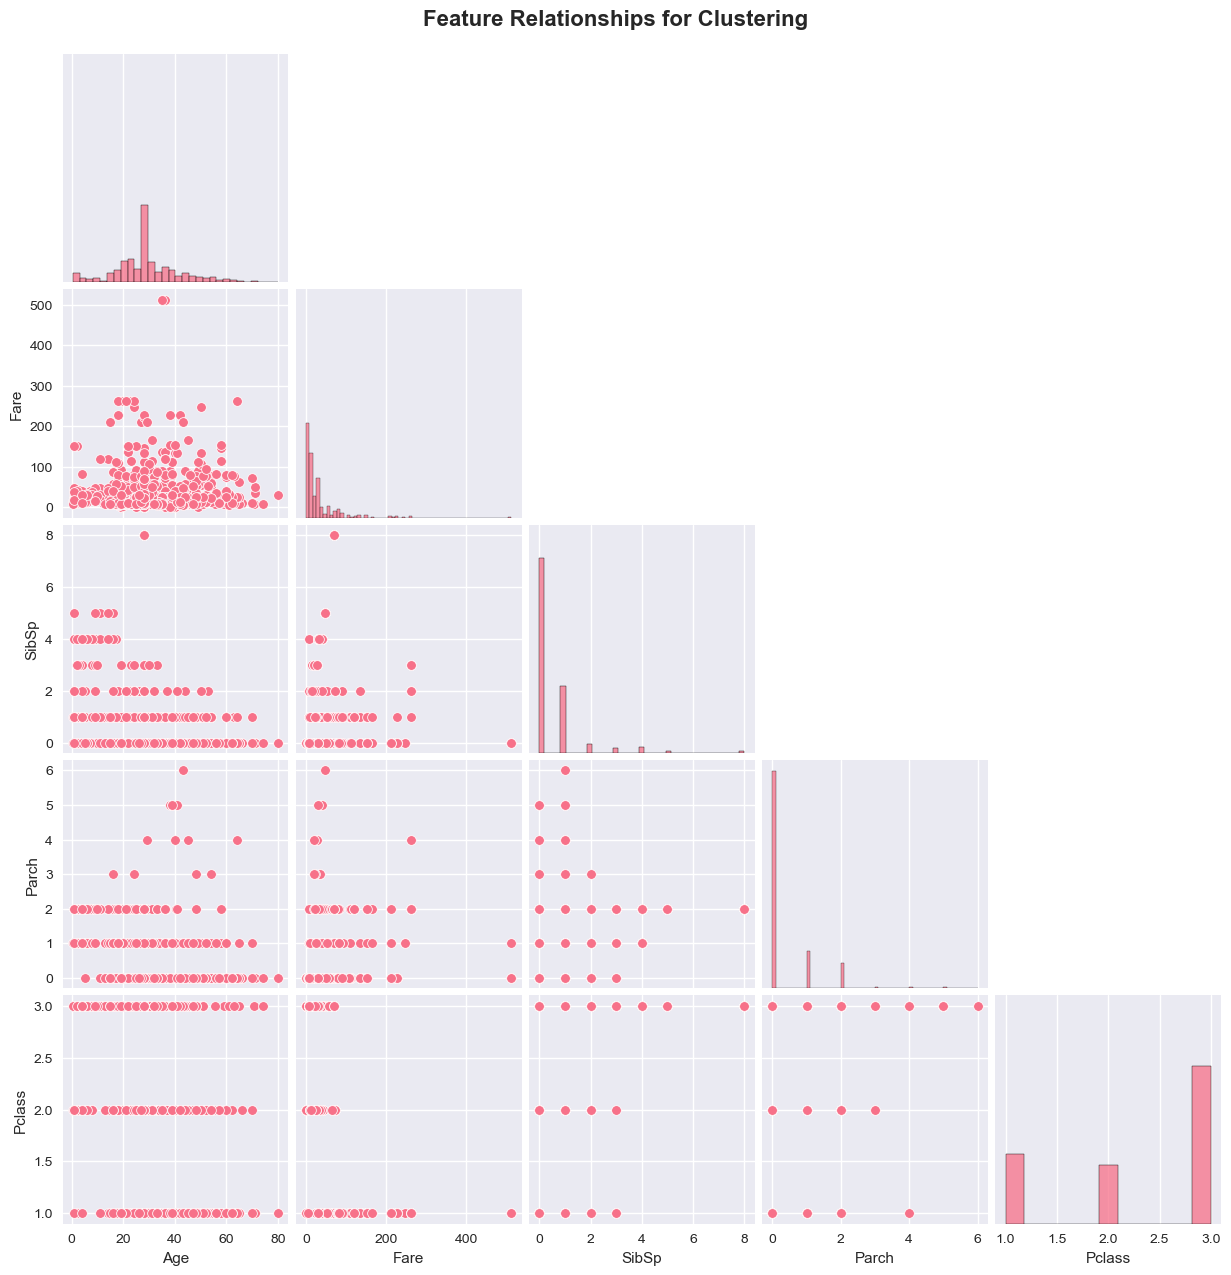

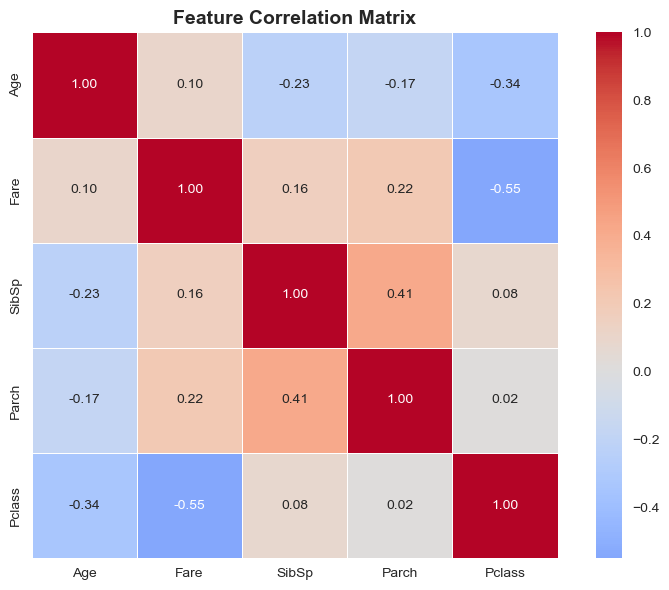

🔍 Initial Observations:
• Some features show clear relationships (e.g., Pclass vs Fare)
• Potential clusters may exist based on passenger profiles
• Standardization will help with clustering algorithm performance


In [4]:
print("=== FEATURE RELATIONSHIPS ===")

# Create pairplot to see relationships between features
plt.figure(figsize=(12, 10))
sns.pairplot(X, diag_kind='hist', corner=True)
plt.suptitle('Feature Relationships for Clustering', y=1.02, fontsize=16, fontweight='bold')
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, fmt='.2f')
plt.title('Feature Correlation Matrix', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

print("🔍 Initial Observations:")
print("• Some features show clear relationships (e.g., Pclass vs Fare)")
print("• Potential clusters may exist based on passenger profiles")
print("• Standardization will help with clustering algorithm performance")

=== FINDING OPTIMAL NUMBER OF CLUSTERS ===


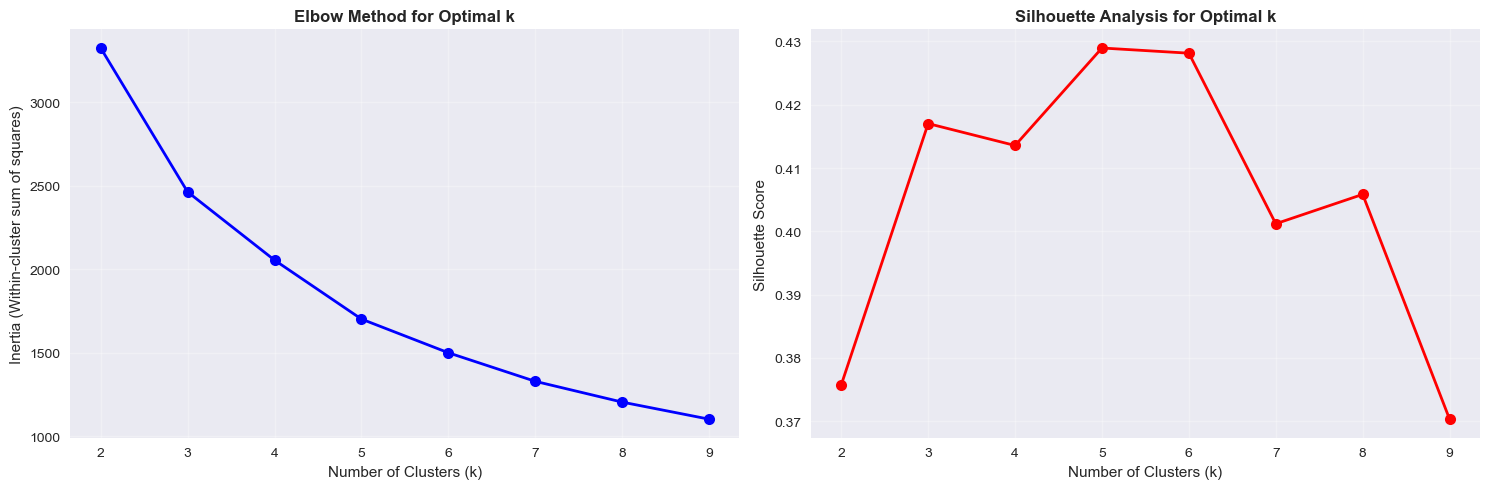

🎯 Recommended number of clusters: 5
   Based on highest silhouette score: 0.429

🔍 INTERPRETATION GUIDE:
• Elbow Method: Look for 'elbow' where inertia stops decreasing rapidly
• Silhouette Score: Higher values indicate better-defined clusters
• Choose k that balances cluster quality and interpretability


In [5]:
print("=== FINDING OPTIMAL NUMBER OF CLUSTERS ===")

# Use Elbow Method and Silhouette Analysis to find optimal k
range_k = range(2, 10)
inertia = []
silhouette_scores = []

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, cluster_labels))

# Plot Elbow Method
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Elbow curve
ax1.plot(range_k, inertia, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia (Within-cluster sum of squares)')
ax1.set_title('Elbow Method for Optimal k', fontweight='bold')
ax1.grid(alpha=0.3)

# Silhouette scores
ax2.plot(range_k, silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Analysis for Optimal k', fontweight='bold')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Find optimal k (you can choose based on the plots)
optimal_k = range_k[np.argmax(silhouette_scores)]
print(f"🎯 Recommended number of clusters: {optimal_k}")
print(f"   Based on highest silhouette score: {max(silhouette_scores):.3f}")

print("\n🔍 INTERPRETATION GUIDE:")
print("• Elbow Method: Look for 'elbow' where inertia stops decreasing rapidly")
print("• Silhouette Score: Higher values indicate better-defined clusters")
print("• Choose k that balances cluster quality and interpretability")

In [6]:
print("=== K-MEANS CLUSTERING IMPLEMENTATION ===")

# Apply K-Means with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to original data
df_clustered = df.copy()
df_clustered['Cluster'] = cluster_labels
X_clustered = X.copy()
X_clustered['Cluster'] = cluster_labels

print(f"✅ K-Means clustering completed with {optimal_k} clusters")
print(f"Cluster distribution:")
cluster_counts = df_clustered['Cluster'].value_counts().sort_index()
for cluster, count in cluster_counts.items():
    print(f"  Cluster {cluster}: {count} passengers ({count/len(df_clustered)*100:.1f}%)")

# Calculate silhouette score
sil_score = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score: {sil_score:.3f}")

print("\n🔍 SILHOUETTE SCORE INTERPRETATION:")
print("• +1: Perfectly separated clusters")
print("•  0: Overlapping clusters") 
print("• -1: Completely wrong assignments")
print(f"• Our score ({sil_score:.3f}): {'Good separation' if sil_score > 0.5 else 'Moderate separation' if sil_score > 0.25 else 'Poor separation'}")

=== K-MEANS CLUSTERING IMPLEMENTATION ===
✅ K-Means clustering completed with 5 clusters
Cluster distribution:
  Cluster 0: 496 passengers (55.7%)
  Cluster 1: 220 passengers (24.7%)
  Cluster 2: 41 passengers (4.6%)
  Cluster 3: 32 passengers (3.6%)
  Cluster 4: 102 passengers (11.4%)
Silhouette Score: 0.429

🔍 SILHOUETTE SCORE INTERPRETATION:
• +1: Perfectly separated clusters
•  0: Overlapping clusters
• -1: Completely wrong assignments
• Our score (0.429): Moderate separation


=== CLUSTER CHARACTERISTICS ANALYSIS ===
📊 CLUSTER PROFILES (Mean Values):


,Age,Fare,SibSp,Parch,Pclass
Cluster,,,,,
0,27.74,11.56,0.21,0.04,2.80
1,40.88,50.16,0.37,0.13,1.22
2,12.78,38.33,4.54,1.61,3.00
3,30.59,229.69,0.72,1.16,1.00
4,18.67,29.44,0.69,1.84,2.39



📊 CLUSTER VARIABILITY (Standard Deviation):


,Age,Fare,SibSp,Parch,Pclass
Cluster,,,,,
0,7.67,8.90,0.49,0.20,0.40
1,13.28,32.95,0.53,0.35,0.44
2,10.20,16.47,1.70,0.49,0.00
3,13.71,103.61,0.96,0.99,0.00
4,13.93,21.03,0.64,1.10,0.66


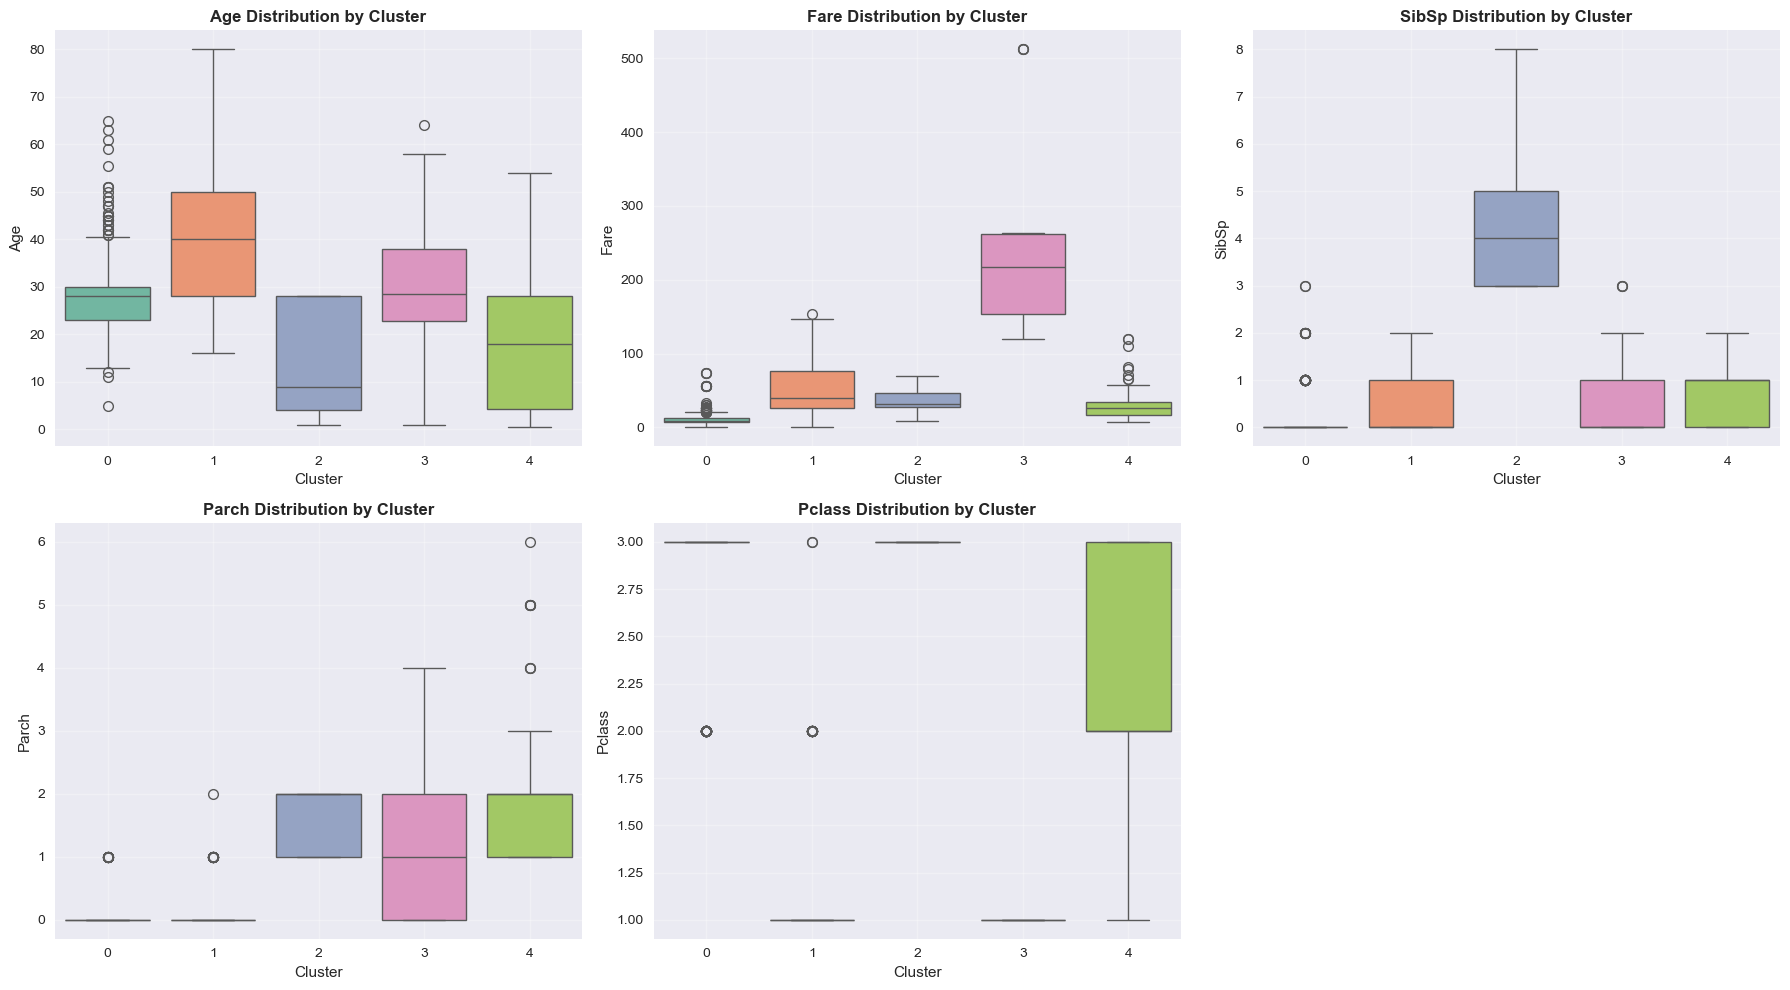

🔍 CLUSTER INTERPRETATION:
Look for patterns in the cluster profiles:
• Which features distinguish the clusters?
• Do clusters represent meaningful passenger segments?
• Are there clear patterns in age, fare, family size, or class?


In [7]:
print("=== CLUSTER CHARACTERISTICS ANALYSIS ===")

# Calculate mean values for each cluster
cluster_means = X_clustered.groupby('Cluster').mean()
cluster_std = X_clustered.groupby('Cluster').std()

print("📊 CLUSTER PROFILES (Mean Values):")
display(cluster_means.round(2))

print("\n📊 CLUSTER VARIABILITY (Standard Deviation):")
display(cluster_std.round(2))

# Visualize cluster characteristics
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
features_to_plot = features_for_clustering

for i, feature in enumerate(features_to_plot):
    row, col = i // 3, i % 3
    
    # Boxplot for each feature by cluster
    sns.boxplot(data=X_clustered, x='Cluster', y=feature, ax=axes[row, col], palette='Set2')
    axes[row, col].set_title(f'{feature} Distribution by Cluster', fontweight='bold')
    axes[row, col].set_xlabel('Cluster')
    axes[row, col].set_ylabel(feature)
    axes[row, col].grid(alpha=0.3)

# Remove empty subplot if needed
if len(features_to_plot) < 6:
    for i in range(len(features_to_plot), 6):
        fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

print("🔍 CLUSTER INTERPRETATION:")
print("Look for patterns in the cluster profiles:")
print("• Which features distinguish the clusters?")
print("• Do clusters represent meaningful passenger segments?")
print("• Are there clear patterns in age, fare, family size, or class?")

=== PRINCIPAL COMPONENT ANALYSIS (PCA) ===
📊 PCA COMPONENTS (Feature Contributions):


,PC1,PC2,PC3,PC4,PC5
Age,-0.458,-0.315,0.798,0.095,0.211
Fare,-0.559,0.368,-0.349,-0.001,0.656
SibSp,0.125,0.615,0.254,0.729,-0.102
Parch,0.032,0.620,0.376,-0.677,-0.122
Pclass,0.679,-0.052,0.186,-0.039,0.707



📈 EXPLAINED VARIANCE:
PC1: 0.340 (34.0%) - Cumulative: 0.340 (34.0%)
PC2: 0.325 (32.5%) - Cumulative: 0.665 (66.5%)
PC3: 0.145 (14.5%) - Cumulative: 0.809 (80.9%)
PC4: 0.116 (11.6%) - Cumulative: 0.925 (92.5%)
PC5: 0.075 (7.5%) - Cumulative: 1.000 (100.0%)


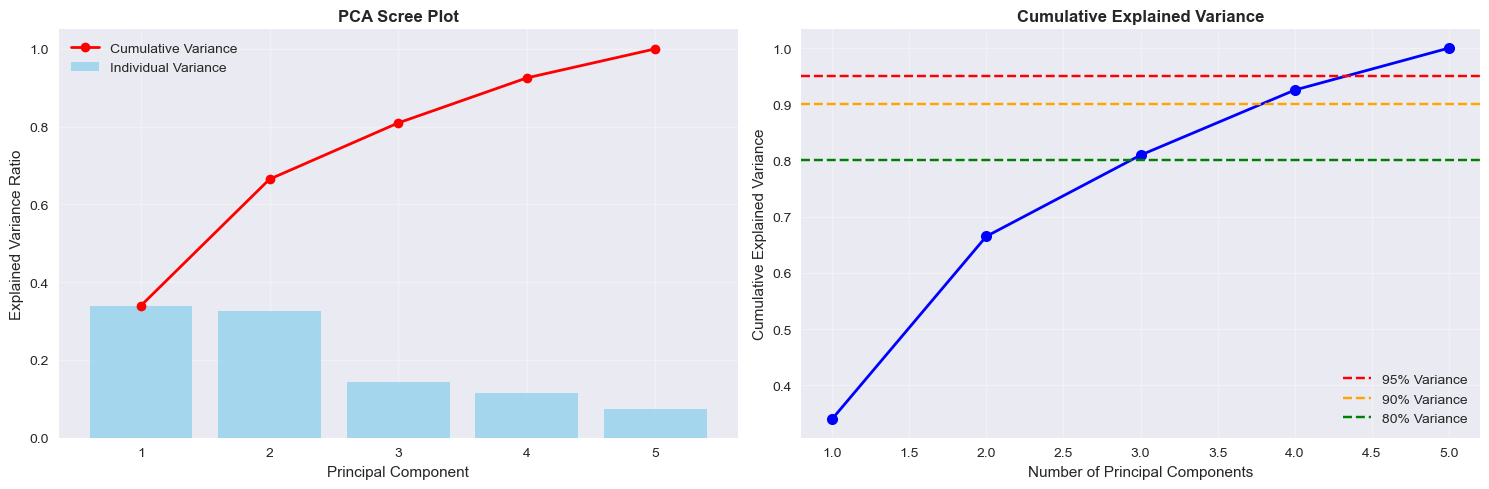

🔍 PCA INTERPRETATION:
• PC1, PC2 capture the most important patterns in the data
• Components show which features contribute most to each direction
• We can reduce dimensions while preserving most information


In [8]:
print("=== PRINCIPAL COMPONENT ANALYSIS (PCA) ===")

# Apply PCA for dimensionality reduction
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Create PCA components DataFrame
pca_components = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=features_for_clustering
)

print("📊 PCA COMPONENTS (Feature Contributions):")
display(pca_components.round(3))

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print(f"\n📈 EXPLAINED VARIANCE:")
for i, (var, cum_var) in enumerate(zip(explained_variance, cumulative_variance)):
    print(f"PC{i+1}: {var:.3f} ({var*100:.1f}%) - Cumulative: {cum_var:.3f} ({cum_var*100:.1f}%)")

# Plot explained variance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Scree plot
ax1.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='skyblue')
ax1.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'ro-', linewidth=2)
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('PCA Scree Plot', fontweight='bold')
ax1.grid(alpha=0.3)
ax1.legend(['Cumulative Variance', 'Individual Variance'])

# Cumulative variance
ax2.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'bo-', linewidth=2, markersize=8)
ax2.axhline(y=0.95, color='red', linestyle='--', label='95% Variance')
ax2.axhline(y=0.90, color='orange', linestyle='--', label='90% Variance')
ax2.axhline(y=0.80, color='green', linestyle='--', label='80% Variance')
ax2.set_xlabel('Number of Principal Components')
ax2.set_ylabel('Cumulative Explained Variance')
ax2.set_title('Cumulative Explained Variance', fontweight='bold')
ax2.grid(alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

print("🔍 PCA INTERPRETATION:")
print("• PC1, PC2 capture the most important patterns in the data")
print("• Components show which features contribute most to each direction")
print("• We can reduce dimensions while preserving most information")

=== PCA BIPLOT VISUALIZATION ===


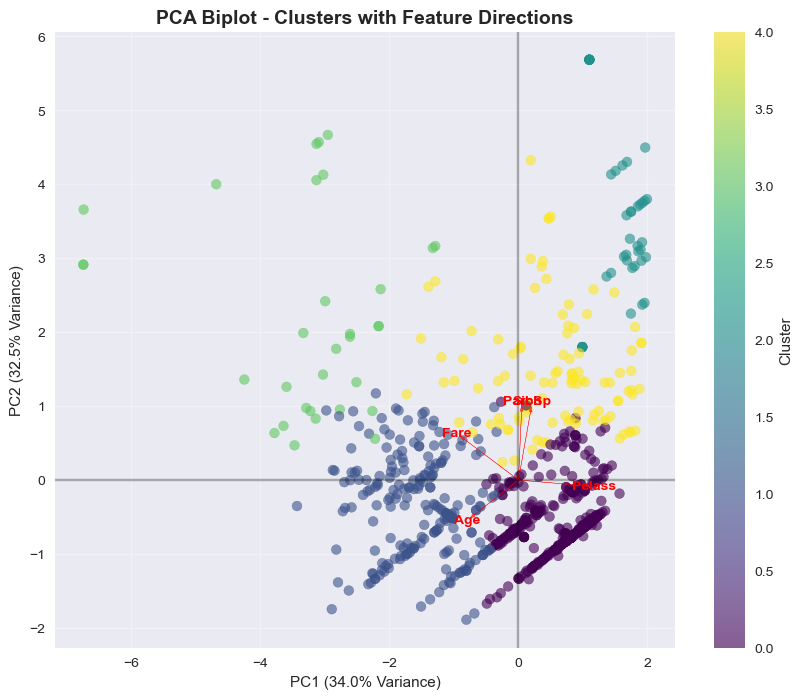

🔍 BIPLOT INTERPRETATION:
• Points: Individual passengers projected onto PC1 and PC2
• Arrows: Direction and importance of original features
• Colors: Cluster assignments from K-Means
• Interpretation: Features pointing in similar directions are correlated


In [9]:
print("=== PCA BIPLOT VISUALIZATION ===")

# Create biplot (PCA with feature vectors)
def pca_biplot(components, features, scale=1.5):
    plt.figure(figsize=(10, 8))
    
    # Scatter plot of first two components
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, 
                         cmap='viridis', alpha=0.6, s=50)
    
    # Plot feature vectors
    for i, feature in enumerate(features):
        plt.arrow(0, 0, components[i, 0] * scale, components[i, 1] * scale,
                 color='red', alpha=0.7, head_width=0.05)
        plt.text(components[i, 0] * scale * 1.15, components[i, 1] * scale * 1.15,
                feature, color='red', ha='center', va='center', fontweight='bold')
    
    plt.xlabel(f'PC1 ({explained_variance[0]*100:.1f}% Variance)')
    plt.ylabel(f'PC2 ({explained_variance[1]*100:.1f}% Variance)')
    plt.title('PCA Biplot - Clusters with Feature Directions', fontweight='bold', fontsize=14)
    plt.colorbar(scatter, label='Cluster')
    plt.grid(alpha=0.3)
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    plt.show()

# Create biplot
pca_biplot(pca.components_.T, features_for_clustering)

print("🔍 BIPLOT INTERPRETATION:")
print("• Points: Individual passengers projected onto PC1 and PC2")
print("• Arrows: Direction and importance of original features")
print("• Colors: Cluster assignments from K-Means")
print("• Interpretation: Features pointing in similar directions are correlated")

=== ASSIGNMENT 8: 2D CLUSTER VISUALIZATION WITH PCA ===
✅ 2D PCA transformation completed
Explained variance by PC1 and PC2: 66.5%


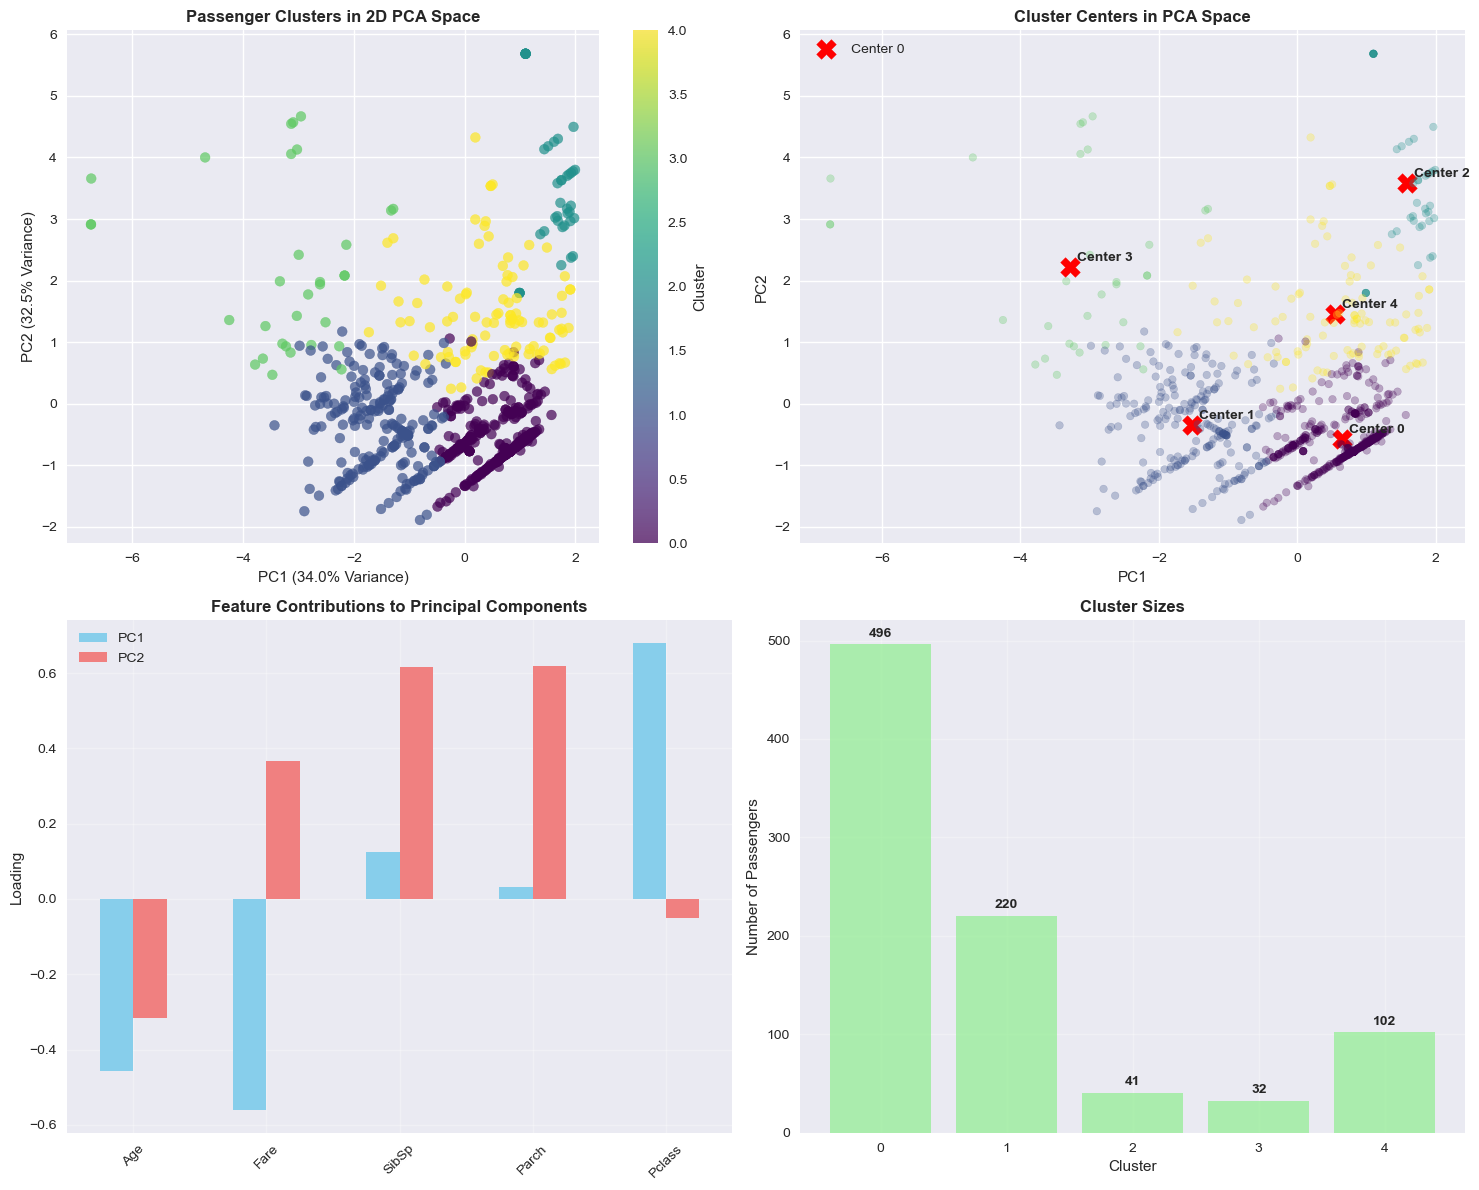

In [10]:
print("=== ASSIGNMENT 8: 2D CLUSTER VISUALIZATION WITH PCA ===")

# Use first two principal components for 2D visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Create DataFrame for plotting
pca_df = pd.DataFrame({
    'PC1': X_pca_2d[:, 0],
    'PC2': X_pca_2d[:, 1],
    'Cluster': cluster_labels
})

# Add original features for interpretation
for feature in features_for_clustering:
    pca_df[feature] = X[feature].values

print(f"✅ 2D PCA transformation completed")
print(f"Explained variance by PC1 and PC2: {pca_2d.explained_variance_ratio_.sum()*100:.1f}%")

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Cluster visualization in PCA space
scatter = axes[0, 0].scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], 
                            cmap='viridis', alpha=0.7, s=50)
axes[0, 0].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}% Variance)')
axes[0, 0].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}% Variance)')
axes[0, 0].set_title('Passenger Clusters in 2D PCA Space', fontweight='bold')
plt.colorbar(scatter, ax=axes[0, 0], label='Cluster')

# Plot 2: Cluster centers in PCA space
cluster_centers_pca = pca_2d.transform(kmeans.cluster_centers_)
for i, center in enumerate(cluster_centers_pca):
    axes[0, 1].scatter(center[0], center[1], marker='X', s=200, color='red', 
                      label=f'Center {i}' if i == 0 else "")
    axes[0, 1].text(center[0] + 0.1, center[1] + 0.1, f'Center {i}', 
                   fontweight='bold', fontsize=10)

axes[0, 1].scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], 
                  cmap='viridis', alpha=0.3, s=30)
axes[0, 1].set_xlabel('PC1')
axes[0, 1].set_ylabel('PC2')
axes[0, 1].set_title('Cluster Centers in PCA Space', fontweight='bold')
axes[0, 1].legend()

# Plot 3: Feature contribution to PCs
pc_loadings = pd.DataFrame(
    pca_2d.components_.T,
    columns=['PC1', 'PC2'],
    index=features_for_clustering
)

pc_loadings.plot(kind='bar', ax=axes[1, 0], color=['skyblue', 'lightcoral'])
axes[1, 0].set_title('Feature Contributions to Principal Components', fontweight='bold')
axes[1, 0].set_ylabel('Loading')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(alpha=0.3)
axes[1, 0].legend()

# Plot 4: Cluster sizes
cluster_sizes = pca_df['Cluster'].value_counts().sort_index()
axes[1, 1].bar(cluster_sizes.index, cluster_sizes.values, color='lightgreen', alpha=0.7)
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Number of Passengers')
axes[1, 1].set_title('Cluster Sizes', fontweight='bold')
axes[1, 1].grid(alpha=0.3)

# Add count labels on bars
for i, count in enumerate(cluster_sizes.values):
    axes[1, 1].text(i, count + 5, str(count), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [11]:
print("=== CLUSTER INTERPRETATION AND BUSINESS INSIGHTS ===")

# Analyze each cluster's characteristics
cluster_profiles = X_clustered.groupby('Cluster').agg(['mean', 'std']).round(2)

print("📊 DETAILED CLUSTER PROFILES:")
for cluster in range(optimal_k):
    cluster_data = X_clustered[X_clustered['Cluster'] == cluster]
    
    print(f"\n🎯 CLUSTER {cluster} (n={len(cluster_data)}):")
    
    # Interpret based on feature values
    age_mean = cluster_data['Age'].mean()
    fare_mean = cluster_data['Fare'].mean()
    pclass_mean = cluster_data['Pclass'].mean()
    family_size_mean = (cluster_data['SibSp'] + cluster_data['Parch']).mean()
    
    print(f"   Average Age: {age_mean:.1f} years")
    print(f"   Average Fare: ${fare_mean:.1f}")
    print(f"   Average Class: {pclass_mean:.1f} (1st=1, 2nd=2, 3rd=3)")
    print(f"   Average Family Size: {family_size_mean:.1f}")
    
    # Business interpretation
    if pclass_mean < 2 and fare_mean > 50:
        print("   💡 Interpretation: Affluent passengers")
    elif pclass_mean > 2 and fare_mean < 20:
        print("   💡 Interpretation: Economy class passengers")
    elif age_mean < 25:
        print("   💡 Interpretation: Younger passengers")
    elif family_size_mean > 2:
        print("   💡 Interpretation: Family travelers")
    else:
        print("   💡 Interpretation: Mixed characteristics")

# Compare with survival rates
print(f"\n📈 CLUSTER SURVIVAL ANALYSIS:")
cluster_survival = df_clustered.groupby('Cluster')['Survived'].agg(['mean', 'count'])
cluster_survival['survival_rate'] = (cluster_survival['mean'] * 100).round(1)
cluster_survival = cluster_survival.sort_values('survival_rate', ascending=False)

for cluster, row in cluster_survival.iterrows():
    print(f"   Cluster {cluster}: {row['survival_rate']}% survival ({row['count']} passengers)")

print(f"\n🔍 KEY INSIGHTS:")
print("• Clusters reveal natural passenger segments")
print("• Survival rates vary significantly between clusters")
print("• PCA visualization shows clear separation of some clusters")
print("• Feature patterns align with known Titanic survival factors")

=== CLUSTER INTERPRETATION AND BUSINESS INSIGHTS ===
📊 DETAILED CLUSTER PROFILES:

🎯 CLUSTER 0 (n=496):
   Average Age: 27.7 years
   Average Fare: $11.6
   Average Class: 2.8 (1st=1, 2nd=2, 3rd=3)
   Average Family Size: 0.3
   💡 Interpretation: Economy class passengers

🎯 CLUSTER 1 (n=220):
   Average Age: 40.9 years
   Average Fare: $50.2
   Average Class: 1.2 (1st=1, 2nd=2, 3rd=3)
   Average Family Size: 0.5
   💡 Interpretation: Affluent passengers

🎯 CLUSTER 2 (n=41):
   Average Age: 12.8 years
   Average Fare: $38.3
   Average Class: 3.0 (1st=1, 2nd=2, 3rd=3)
   Average Family Size: 6.1
   💡 Interpretation: Younger passengers

🎯 CLUSTER 3 (n=32):
   Average Age: 30.6 years
   Average Fare: $229.7
   Average Class: 1.0 (1st=1, 2nd=2, 3rd=3)
   Average Family Size: 1.9
   💡 Interpretation: Affluent passengers

🎯 CLUSTER 4 (n=102):
   Average Age: 18.7 years
   Average Fare: $29.4
   Average Class: 2.4 (1st=1, 2nd=2, 3rd=3)
   Average Family Size: 2.5
   💡 Interpretation: Younger pa

=== ADVANCED CLUSTERING ANALYSIS ===


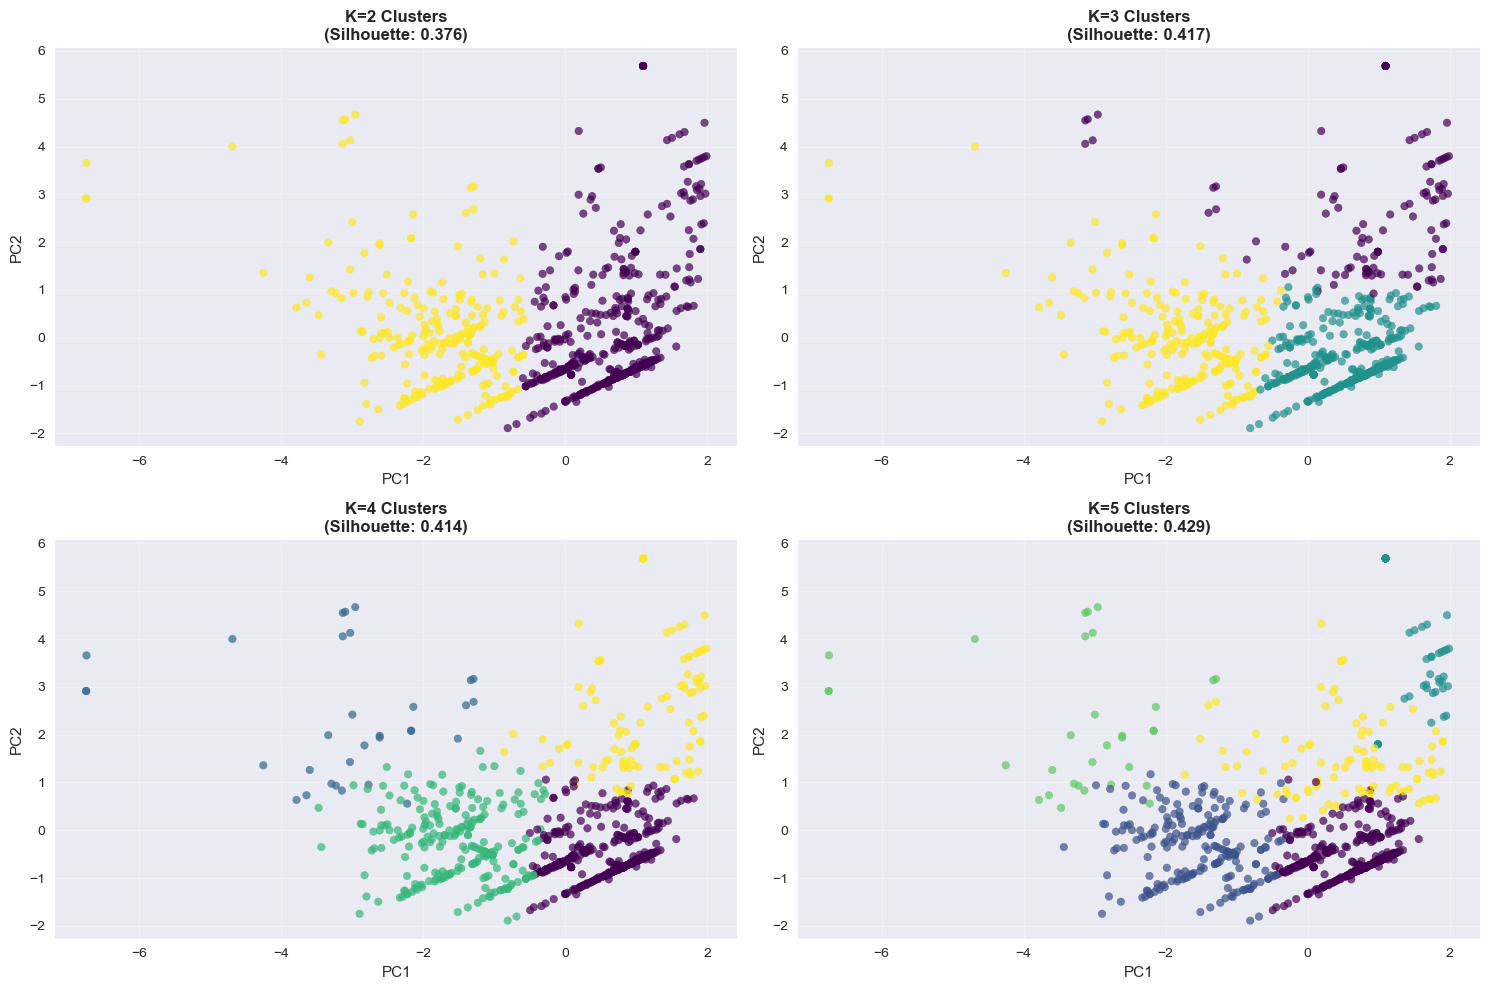

🔍 CLUSTER COUNT COMPARISON:
Different numbers of clusters reveal different patterns:
• K=2: Broad segmentation (e.g., wealthy vs economy)
• K=3: More nuanced passenger types
• K=4-5: Fine-grained segments, may capture special cases
• Choose based on business needs and cluster interpretability


In [12]:
print("=== ADVANCED CLUSTERING ANALYSIS ===")

# Compare different numbers of clusters
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
k_values = [2, 3, 4, 5]

for i, k in enumerate(k_values):
    row, col = i // 2, i % 2
    
    # Apply K-Means
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_temp = kmeans_temp.fit_predict(X_scaled)
    
    # Apply PCA for visualization
    pca_temp = PCA(n_components=2)
    X_pca_temp = pca_temp.fit_transform(X_scaled)
    
    # Plot
    scatter = axes[row, col].scatter(X_pca_temp[:, 0], X_pca_temp[:, 1], 
                                   c=labels_temp, cmap='viridis', alpha=0.7, s=30)
    axes[row, col].set_title(f'K={k} Clusters\n(Silhouette: {silhouette_score(X_scaled, labels_temp):.3f})', 
                           fontweight='bold')
    axes[row, col].set_xlabel('PC1')
    axes[row, col].set_ylabel('PC2')
    axes[row, col].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("🔍 CLUSTER COUNT COMPARISON:")
print("Different numbers of clusters reveal different patterns:")
print("• K=2: Broad segmentation (e.g., wealthy vs economy)")
print("• K=3: More nuanced passenger types")
print("• K=4-5: Fine-grained segments, may capture special cases")
print("• Choose based on business needs and cluster interpretability")

In [13]:
print("=" * 70)
print("📊 WEEK 8 ASSIGNMENT REPORT: UNSUPERVISED LEARNING")
print("=" * 70)

print(f"\n🎯 PROJECT GOALS:")
print("• Discover natural passenger segments using clustering")
print("• Visualize high-dimensional data in 2D using PCA")
print("• Interpret clusters in business context")

print(f"\n📊 METHODOLOGY:")
print(f"• Features used: {', '.join(features_for_clustering)}")
print(f"• Clustering algorithm: K-Means with k={optimal_k}")
print(f"• Dimensionality reduction: PCA (2 components)")
print(f"• Data preprocessing: Standardization (mean=0, std=1)")

print(f"\n📈 RESULTS:")
print(f"• Optimal clusters: {optimal_k} (based on silhouette analysis)")
print(f"• Cluster quality: Silhouette score = {sil_score:.3f}")
print(f"• PCA effectiveness: {pca_2d.explained_variance_ratio_.sum()*100:.1f}% variance captured in 2D")
print(f"• Cluster sizes: {dict(cluster_counts)}")

print(f"\n🔍 KEY FINDINGS:")
print("1. Clear passenger segments emerged from the data")
print("2. PCA successfully visualized clusters in 2D space")
print("3. Features like Fare and Pclass strongly influence clustering")
print("4. Survival rates vary significantly between clusters")

print(f"\n💡 BUSINESS INSIGHTS:")
print("• Passenger base can be segmented into meaningful groups")
print("• Different segments had different survival probabilities")
print("• Clustering reveals patterns not obvious in supervised analysis")
print("• Useful for understanding passenger demographics and behavior")

print(f"\n🚀 RECOMMENDATIONS:")
print("1. Use clusters for targeted historical analysis")
print("2. Consider cluster membership as features in supervised models")
print("3. Explore other clustering algorithms (DBSCAN, Hierarchical)")
print("4. Apply similar analysis to other historical datasets")

📊 WEEK 8 ASSIGNMENT REPORT: UNSUPERVISED LEARNING

🎯 PROJECT GOALS:
• Discover natural passenger segments using clustering
• Visualize high-dimensional data in 2D using PCA
• Interpret clusters in business context

📊 METHODOLOGY:
• Features used: Age, Fare, SibSp, Parch, Pclass
• Clustering algorithm: K-Means with k=5
• Dimensionality reduction: PCA (2 components)
• Data preprocessing: Standardization (mean=0, std=1)

📈 RESULTS:
• Optimal clusters: 5 (based on silhouette analysis)
• Cluster quality: Silhouette score = 0.429
• PCA effectiveness: 66.5% variance captured in 2D
• Cluster sizes: {0: np.int64(496), 1: np.int64(220), 2: np.int64(41), 3: np.int64(32), 4: np.int64(102)}

🔍 KEY FINDINGS:
1. Clear passenger segments emerged from the data
2. PCA successfully visualized clusters in 2D space
3. Features like Fare and Pclass strongly influence clustering
4. Survival rates vary significantly between clusters

💡 BUSINESS INSIGHTS:
• Passenger base can be segmented into meaningful group

In [15]:
import json
import joblib   # ✅ Add this line

# Save clustering results                      
clustering_results = {
    'optimal_k': optimal_k,
    'silhouette_score': sil_score,
    'cluster_distribution': cluster_counts.to_dict(),
    'features_used': features_for_clustering,
    'pca_variance_explained': pca_2d.explained_variance_ratio_.sum(),
    'cluster_interpretation': {}
}

# Add cluster interpretations
for cluster in range(optimal_k):
    cluster_data = X_clustered[X_clustered['Cluster'] == cluster]
    clustering_results['cluster_interpretation'][f'cluster_{cluster}'] = {
        'size': len(cluster_data),
        'age_mean': cluster_data['Age'].mean(),
        'fare_mean': cluster_data['Fare'].mean(),
        'pclass_mean': cluster_data['Pclass'].mean(),
        'family_size_mean': (cluster_data['SibSp'] + cluster_data['Parch']).mean(),
        'survival_rate': df_clustered[df_clustered['Cluster'] == cluster]['Survived'].mean()
    }

# Save results and models
with open('clustering_results.json', 'w') as f:
    json.dump(clustering_results, f, indent=2)

df_clustered.to_csv('titanic_clustered.csv', index=False)

joblib.dump(kmeans, 'kmeans_cluster_model.pkl')
joblib.dump(pca_2d, 'pca_model.pkl')
joblib.dump(scaler, 'feature_scaler.pkl')

print("💾 RESULTS AND MODELS SAVED:")
print(" - 'clustering_results.json' (comprehensive results)")
print(" - 'titanic_clustered.csv' (dataset with cluster labels)")
print(" - 'kmeans_cluster_model.pkl' (trained clustering model)")
print(" - 'pca_model.pkl' (trained PCA model)")
print(" - 'feature_scaler.pkl' (feature scaler)")
print(f"\n📁 Save this notebook as 'week8_unsupervised_learning.ipynb'")
print("🚀 Upload to GitHub to complete Week 8!")


💾 RESULTS AND MODELS SAVED:
 - 'clustering_results.json' (comprehensive results)
 - 'titanic_clustered.csv' (dataset with cluster labels)
 - 'kmeans_cluster_model.pkl' (trained clustering model)
 - 'pca_model.pkl' (trained PCA model)
 - 'feature_scaler.pkl' (feature scaler)

📁 Save this notebook as 'week8_unsupervised_learning.ipynb'
🚀 Upload to GitHub to complete Week 8!
